In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.25, style='whitegrid', palette=sns.color_palette('Set1'))

In [30]:
raw_mem_data = pd.DataFrame([
    { 'dataset': 'Elevators', 'method': 'SGPR', 'peak_mem': 1.5 },
    { 'dataset': 'Elevators', 'method': 'SKIP', 'peak_mem': 3 },
    { 'dataset': 'Elevators', 'method': 'Simplex-GP', 'peak_mem': 1 },
    { 'dataset': 'Houseelectric', 'method': 'SGPR', 'peak_mem': 16.5 },
    { 'dataset': 'Houseelectric', 'method': 'Simplex-GP', 'peak_mem': 2.5 },
    { 'dataset': 'Keggdirected', 'method': 'SGPR', 'peak_mem': 2.5 },
    { 'dataset': 'Keggdirected', 'method': 'SKIP', 'peak_mem': 11.5 },
    { 'dataset': 'Keggdirected', 'method': 'Simplex-GP', 'peak_mem': 1.5 },
    { 'dataset': 'Precipitation', 'method': 'SGPR', 'peak_mem': 19.2 },
    { 'dataset': 'Precipitation', 'method': 'SKIP', 'peak_mem': 12 },
    { 'dataset': 'Precipitation', 'method': 'Simplex-GP', 'peak_mem': 1.5 },
    { 'dataset': 'Protein', 'method': 'SGPR', 'peak_mem': 2.4 },
    { 'dataset': 'Protein', 'method': 'SKIP', 'peak_mem': 4.5 },
    { 'dataset': 'Protein', 'method': 'Simplex-GP', 'peak_mem': 1.5 },
])
raw_mem_data

,dataset,method,peak_mem
0,Elevators,SGPR,1.5
1,Elevators,SKIP,3.0
2,Elevators,Simplex-GP,1.0
3,Houseelectric,SGPR,16.5
4,Houseelectric,Simplex-GP,2.5
5,Keggdirected,SGPR,2.5
6,Keggdirected,SKIP,11.5
7,Keggdirected,Simplex-GP,1.5
8,Precipitation,SGPR,19.2
9,Precipitation,SKIP,12.0


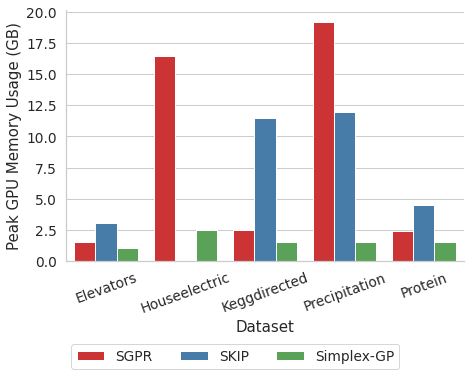

In [33]:
g = sns.catplot(data=raw_mem_data, x='dataset', y='peak_mem', hue='method', kind='bar')

g.ax.set_xlabel('Dataset')
g.ax.set_ylabel('Peak GPU Memory Usage (GB)')
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=20)

g._legend.set_visible(False)
g.fig.subplots_adjust(bottom=0.1)
handles, labels = g.ax.get_legend_handles_labels()
g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., -0.05, 1., 0.),
             loc='lower center', ncol=len(labels), borderaxespad=0., frameon=True)

g.fig.tight_layout()
# g.fig.savefig('mem_usage.pdf', bbox_inches='tight')

In [45]:
raw_speed_data = pd.DataFrame([
    { 'dataset': 'Elevators', 'exact_mvm_t': 0.008, 'simplex_mvm_t': 0.083 },
    { 'dataset': 'Houseelectric', 'exact_mvm_t': 17.1, 'simplex_mvm_t': 1.756 },
    { 'dataset': 'Keggdirected', 'exact_mvm_t': 0.033, 'simplex_mvm_t': 0.134 },
    { 'dataset': 'Precipitation', 'exact_mvm_t': 0.549, 'simplex_mvm_t': 0.082 },
    { 'dataset': 'Protein', 'exact_mvm_t': 0.014, 'simplex_mvm_t': 0.034 },
])

# raw_speed_data['ratio'] = np.log(raw_speed_data['exact_mvm_t'] / raw_speed_data['simplex_mvm_t'])
raw_speed_data['ratio'] = raw_speed_data['exact_mvm_t'] / raw_speed_data['simplex_mvm_t']

raw_speed_data

,dataset,exact_mvm_t,simplex_mvm_t,ratio
0,Elevators,0.008,0.083,0.096386
1,Houseelectric,17.100,1.756,9.738041
2,Keggdirected,0.033,0.134,0.246269
3,Precipitation,0.549,0.082,6.695122
4,Protein,0.014,0.034,0.411765


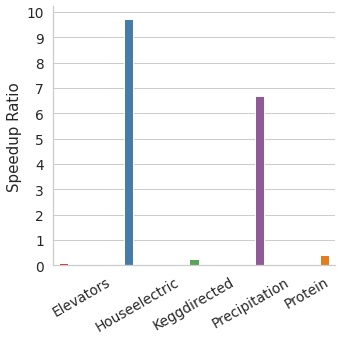

In [52]:
g = sns.catplot(data=raw_speed_data, x='dataset', y='ratio', hue='dataset', kind='bar')

g.ax.set_xlabel(None)
g.ax.set_ylabel('Speedup Ratio')
g.ax.set_yticks(np.arange(0.0, 10.0 + 0.01, 1.0))
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=30)

# g._legend.set_visible(False)
# g.fig.subplots_adjust(bottom=0.1)
# handles, labels = g.ax.get_legend_handles_labels()
# g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0., -0.05, 1., 0.),
#              loc='lower center', ncol=len(labels), borderaxespad=0., frameon=True)

g.fig.tight_layout()
# g.fig.savefig('mvm_speedup.pdf', bbox_inches='tight')